<a href="https://www.kaggle.com/code/rafaelaassuncao/notebook025f6bf896?scriptVersionId=248981468" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageOps

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
np.set_printoptions(precision=2)

In [2]:
data_dir = "/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train"
batch_size = 128
img_height = 40
img_width = 40

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  #label_mode='categorical',
  validation_split=0.2,
  subset="training",
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode='grayscale',
  #shuffle=False,
  seed=123,
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  #label_mode='categorical',
  validation_split=0.2,
  subset="validation",
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode='grayscale',
  #shuffle=False,
  seed=123,
)

class_names = train_ds.class_names
print(class_names)

Found 87000 files belonging to 29 classes.
Using 69600 files for training.
Found 87000 files belonging to 29 classes.
Using 17400 files for validation.
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


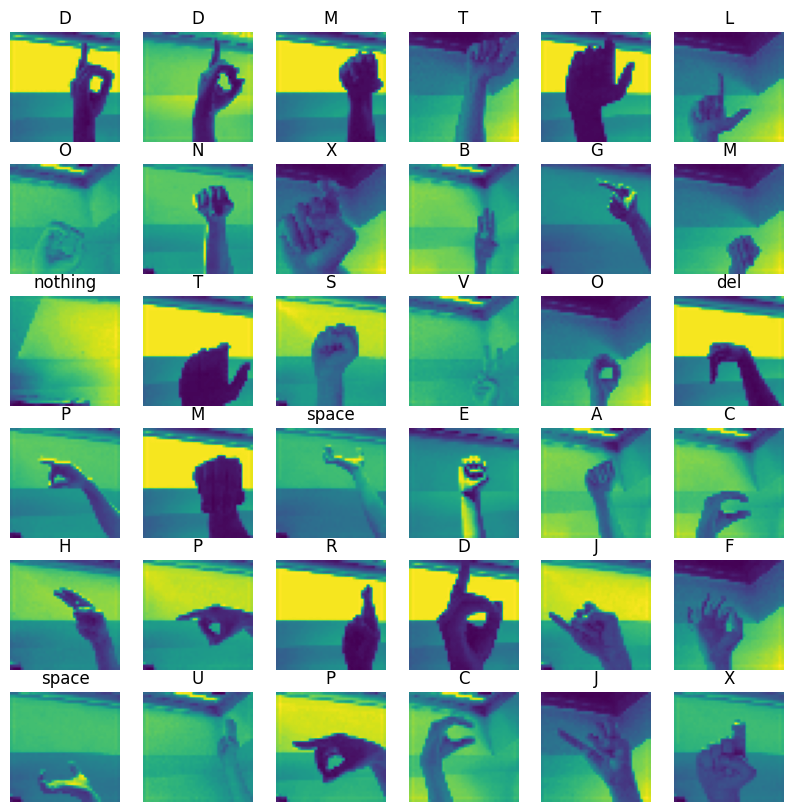

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(36):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [4]:
model = Sequential(
    [
        tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(500, activation='relu'),
        tf.keras.layers.Dense(150, activation='relu'),
        tf.keras.layers.Dense(29, activation='linear')
    ], name = "assignment_model"
)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
epochs = 100

with tf.device('/gpu:0'):
    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        metrics=['accuracy'],
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs
    )

Epoch 1/100


I0000 00:00:1751740009.238870      72 service.cc:145] XLA service 0x7fd3f0009590 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751740009.238935      72 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  5/544 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.0329 - loss: 3.5142

I0000 00:00:1751740010.178970      72 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


544/544 ━━━━━━━━━━━━━━━━━━━━ 99s 179ms/step - accuracy: 0.1314 - loss: 3.1278 - val_accuracy: 0.2647 - val_loss: 2.5683
Epoch 2/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.3021 - loss: 2.4411 - val_accuracy: 0.3884 - val_loss: 2.1457
Epoch 3/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.4171 - loss: 2.0446 - val_accuracy: 0.4704 - val_loss: 1.8296
Epoch 4/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.4974 - loss: 1.7412 - val_accuracy: 0.5413 - val_loss: 1.5900
Epoch 5/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.5581 - loss: 1.5190 - val_accuracy: 0.5892 - val_loss: 1.4022
Epoch 6/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.6030 - loss: 1.3517 - val_accuracy: 0.6106 - val_loss: 1.2738
Epoch 7/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.6455 - loss: 1.2176 - val_accuracy: 0.6583 - val_loss: 1.1458
Epoch 8/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.6788 - loss: 1.1055 - val

In [6]:
model.save('model_fc.keras')

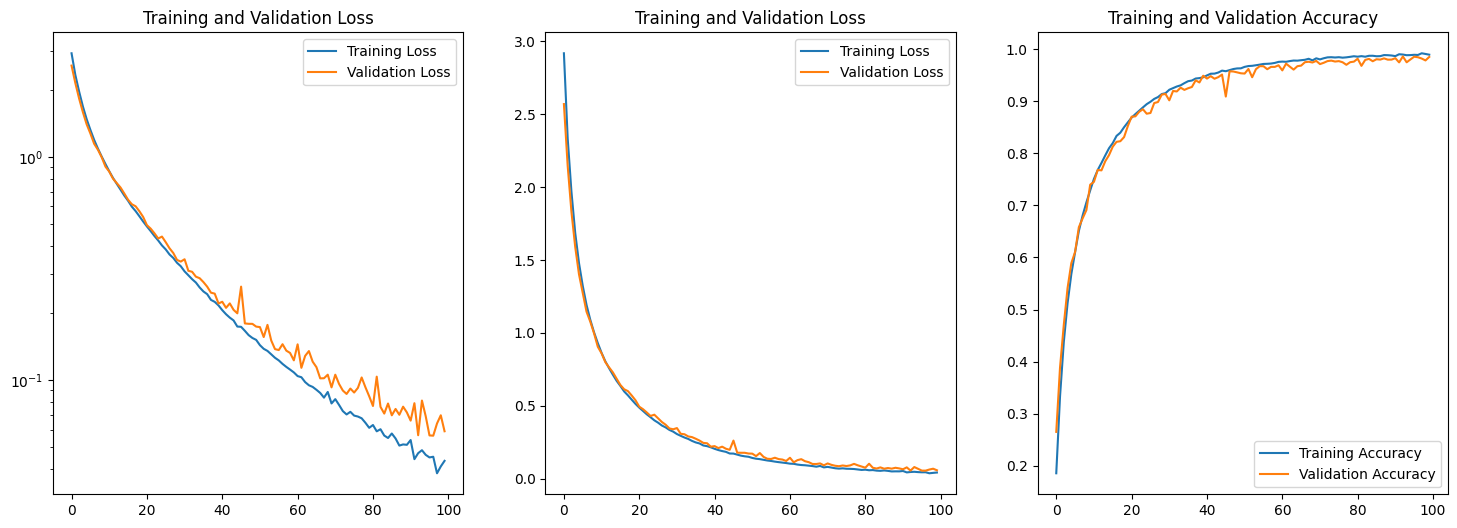

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.semilogy(epochs_range, loss, label='Training Loss')
plt.semilogy(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.subplot(1, 3, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.subplot(1, 3, 3)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

In [8]:
X = np.concatenate([x for x, y in val_ds], axis=0)
y = np.concatenate([y for x, y in val_ds], axis=0)

In [9]:
f = model.predict(X)
yhat = np.argmax(f, axis=1)
doo = yhat != y
idxs = np.where(yhat != y)[0]
#for j in idxs:
 #   print(np.argmax(f[j]))

544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
16769


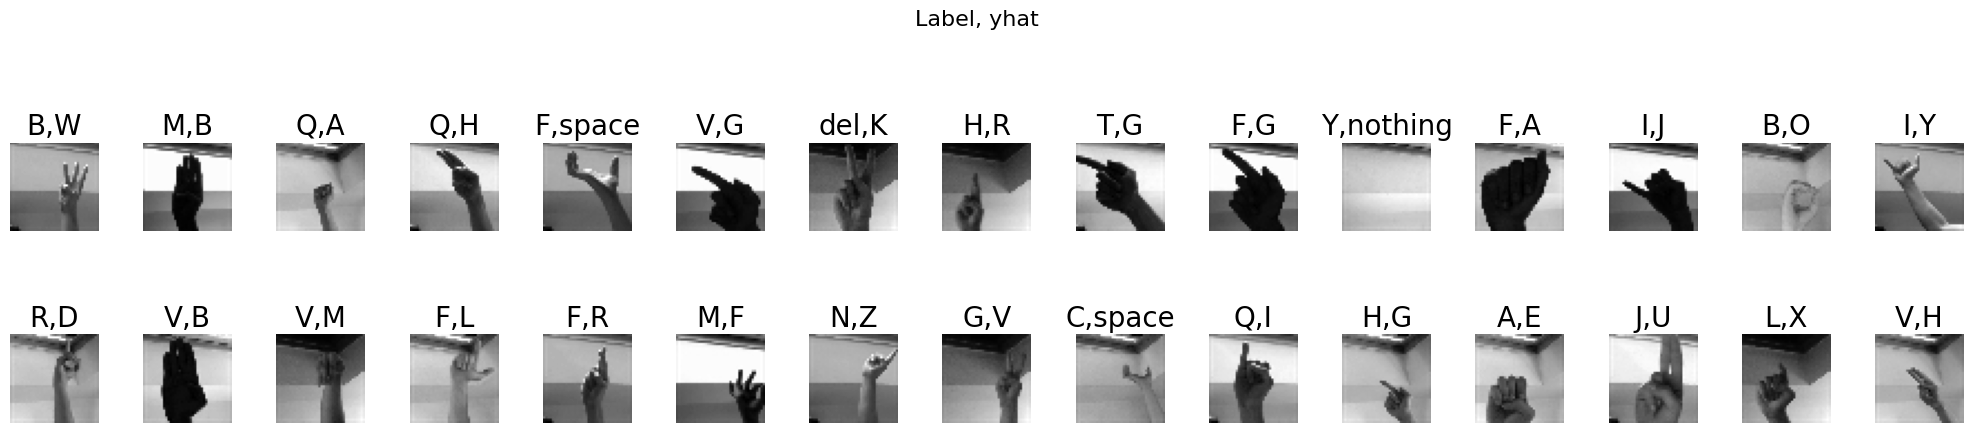

In [10]:
f = model.predict(X)
yhat = np.argmax(f, axis=1)
doo = yhat != y
idxs = np.where(yhat != y)[0]
if len(idxs) == 0:
    print("no errors found")
else:
    print(len(idxs))
    cnt = min(30, len(idxs))
    fig, ax = plt.subplots(2,cnt//2, figsize=(20,5))
    fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.80]) #[left, bottom, right, top]

    for i in range(cnt):
        j = idxs[10000+i]
        X_reshaped = X[j]

        # Display the image
        ax[i // 15][i % 15].imshow(X_reshaped, cmap='gray')

        # Predict using the Neural Network
        prediction = f[j]
        yhat = train_ds.class_names[np.argmax(prediction)]

        # Display the label above the image
        ax[i // 15][i % 15].set_title(f"{train_ds.class_names[y[j]]},{yhat}",fontsize=20)
        ax[i // 15][i % 15].set_axis_off()
        fig.suptitle("Label, yhat", fontsize=16)